<a href="https://colab.research.google.com/github/Lmarra1/sympy-workshop-UC3M-2025/blob/main/spherical_pendulum_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Definition of variables:**

- $L$ — length of the pendulum rod (distance from pivot to mass)  
- $\theta$ — polar angle measured from the vertical downward direction ($\theta = 0$ at the lowest point, positive upward)  
- $\phi$ — azimuthal angle around the vertical axis (rotation in the horizontal plane)  
- $m$ — mass of the pendulum bob  
- $g$ — gravitational acceleration  

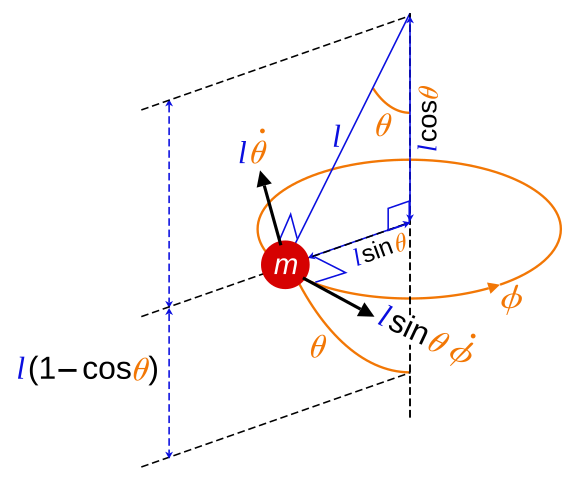

---

**Equations of motion:**

The Lagrangian is defined as $\mathcal{L} = T - V$

with  $T = \frac{1}{2} m \Big[ (L \dot{\theta})^2 + (L \sin\theta \, \dot{\phi})^2 \Big]$ and  $ V = m g L (1 - \cos\theta)$

Applying the Euler–Lagrange equations:  

$$
\frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{\theta}} \right) - \frac{\partial \mathcal{L}}{\partial \theta} = 0, \quad
\frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{\phi}} \right) - \frac{\partial \mathcal{L}}{\partial \phi} = 0
$$

leads to the equations of motion:

$$
\ddot{\theta} - \sin\theta \cos\theta \, \dot{\phi}^2 + \frac{g}{L} \sin\theta = 0, \quad
\frac{d}{dt} \big( \sin^2\theta \, \dot{\phi} \big) = 0
$$


In [3]:
import sympy as sp

In [6]:
# Define the physical variables
t       = sp.Symbol('t', real=True)
m, g, l = sp.symbols('m g l', positive=True)
theta   = sp.Function('theta')(t)
phi     = sp.Function('phi')(t)

# Transformation to cartesian coordinates
x = l * sp.sin(theta) * sp.cos(phi)
y = l * sp.sin(theta) * sp.sin(phi)
z = l-l * sp.cos(theta)

# Position vector
r = sp.Matrix([x, y, z])

# Velocity vector
v = r.diff(t)

print('\nVelocity vector (display format):')
display(v)


v_sq = (v.dot(v))

print('\n Velocity vector squared\n')
display(v_sq)

print('\n Velocity vector squared\n')
display(sp.simplify(v_sq))




Velocity vector (display format):


Matrix([
[-l*sin(phi(t))*sin(theta(t))*Derivative(phi(t), t) + l*cos(phi(t))*cos(theta(t))*Derivative(theta(t), t)],
[ l*sin(phi(t))*cos(theta(t))*Derivative(theta(t), t) + l*sin(theta(t))*cos(phi(t))*Derivative(phi(t), t)],
[                                                                 l*sin(theta(t))*Derivative(theta(t), t)]])


 Velocity vector squared



l**2*sin(theta(t))**2*Derivative(theta(t), t)**2 + (-l*sin(phi(t))*sin(theta(t))*Derivative(phi(t), t) + l*cos(phi(t))*cos(theta(t))*Derivative(theta(t), t))**2 + (l*sin(phi(t))*cos(theta(t))*Derivative(theta(t), t) + l*sin(theta(t))*cos(phi(t))*Derivative(phi(t), t))**2


 Velocity vector squared



l**2*(sin(theta(t))**2*Derivative(phi(t), t)**2 + Derivative(theta(t), t)**2)

In [8]:
# Kinetic and Potential energy
T = sp.simplify( (1/2)*m*(v.dot(v)) )
V = m*g*l*(1 - sp.cos(theta))
L = T - V

print('\n Kinetic energy:\n')
display(sp.simplify(T))

print('\n Potential energy:\n')
display(sp.simplify(V))

print('\n Lagrangian:\n')
display(sp.simplify(L))






 Kinetic energy:



0.5*l**2*m*(sin(theta(t))**2*Derivative(phi(t), t)**2 + Derivative(theta(t), t)**2)


 Potential energy:



g*l*m*(1 - cos(theta(t)))


 Lagrangian:



l*m*(g*(cos(theta(t)) - 1) + 0.5*l*(sin(theta(t))**2*Derivative(phi(t), t)**2 + Derivative(theta(t), t)**2))

In [10]:
# Euler–Lagrange equations
EL_theta   = sp.simplify(sp.diff(sp.diff(L, theta.diff(t)), t) - sp.diff(L, theta))
EL_phi     = sp.simplify(sp.diff(sp.diff(L, phi.diff(t)), t) - sp.diff(L, phi))

print(r'\nEquation in $\theta$\n')
display(EL_theta)
print('\nEquation in phi\n')
display(EL_phi)


\nEquation in $\theta$\n


1.0*l*m*(g*sin(theta(t)) - l*sin(2*theta(t))*Derivative(phi(t), t)**2/2 + l*Derivative(theta(t), (t, 2)))


Equation in phi



l**2*m*(1.0*sin(2*theta(t))*Derivative(phi(t), t)*Derivative(theta(t), t) - 0.5*cos(2*theta(t))*Derivative(phi(t), (t, 2)) + 0.5*Derivative(phi(t), (t, 2)))

In [11]:
theta_dd = sp.Derivative(theta, (t,2))
sol_theta = sp.solve(EL_theta_s, theta_dd)
theta_dd_simpl = sp.trigsimp(sol_theta[0])


phi_dd = sp.Derivative(phi, (t,2))
sol_phi = sp.solve(EL_phi_s, phi_dd)
phi_dd_simpl = sp.trigsimp(sol_phi[0])


print('\n Equation in theta\n')
display(sp.simplify(theta_dd_simpl))

print('\n Equation in phi\n')
display(sp.simplify(phi_dd_simpl))


 Equation in theta



(-g + l*cos(theta(t))*Derivative(phi(t), t)**2)*sin(theta(t))/l


 Equation in phi



-2.0*Derivative(phi(t), t)*Derivative(theta(t), t)/tan(theta(t))

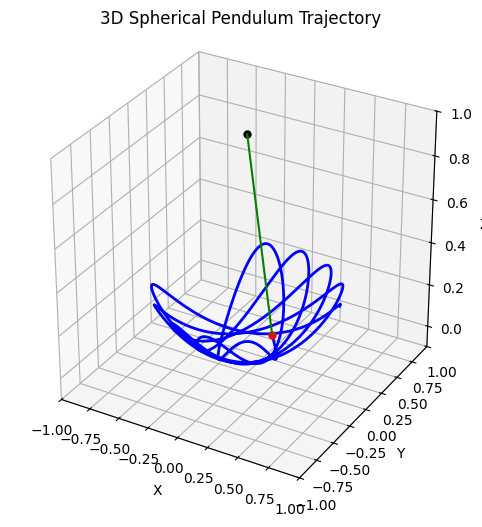

In [20]:


import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Convert SymPy expressions to numerical functions
theta_dd_func = sp.lambdify((theta, phi, theta.diff(t), phi.diff(t), g, l), theta_dd_simpl, 'numpy')
phi_dd_func   = sp.lambdify((theta, phi, theta.diff(t), phi.diff(t), g, l), phi_dd_simpl, 'numpy')

# Define the ODE system: state y = [theta, phi, theta_dot, phi_dot]
def pendulum_system(t, y, g_val, l_val):
    th, ph, th_dot, ph_dot = y
    th_dd = theta_dd_func(th, ph, th_dot, ph_dot, g_val, l_val)
    ph_dd = phi_dd_func(th, ph, th_dot, ph_dot, g_val, l_val)
    return [th_dot, ph_dot, th_dd, ph_dd]

# Parameters
l_val = 1.0
g_val = 9.81

# Initial conditions: [theta0, phi0, theta_dot0, phi_dot0]
y0 = [np.pi/4, 0.2, 0.1, 1.0]

# Time span
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve ODE
sol = solve_ivp(pendulum_system, t_span, y0, t_eval=t_eval, args=(g_val, l_val), rtol=1e-9, atol=1e-9)

# Convert to Cartesian for plotting
x = l_val * np.sin(sol.y[0]) * np.cos(sol.y[1])
y = l_val * np.sin(sol.y[0]) * np.sin(sol.y[1])
z = l_val - l_val * np.cos(sol.y[0])

# Plot 3D trajectory
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, 'b',lw=2)
ax.plot(x[-1], y[-1], z[-1], 'r.', markersize = 10)
ax.plot(0, 0, 1, 'k.', markersize = 10)
ax.plot(np.array([0,x[-1]]), np.array([0,y[-1]]), np.array([1,z[-1]]), 'g-')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.axis('equal')
ax.set_title('3D Spherical Pendulum Trajectory')
ax.set_box_aspect([1,1,1])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-0.1,1])
plt.show()



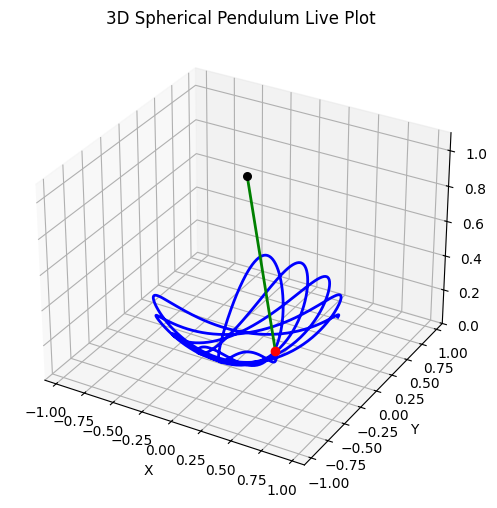

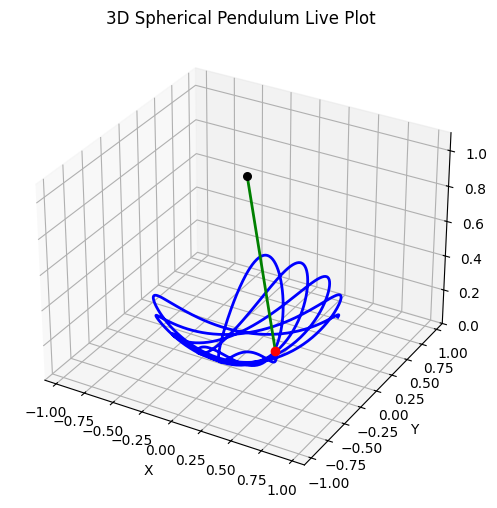

In [18]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output
import numpy as np
import time

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

lim = l_val*1.1
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.set_zlim([0, lim])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Spherical Pendulum Live Plot')

# Pre-create line objects
trajectory_line, = ax.plot([], [], [], lw=2, color='blue')  # trajectory
pendulum_line, = ax.plot([], [], [], lw=2, color='green')  # rod
bob_point, = ax.plot([], [], [], 'ro', markersize=6)        # pendulum bob
pivot_point = ax.scatter(0, 0, l_val, color='black', s=30)     # pivot at origin

# Update loop
for i in range(1, len(t_eval), 10):
    # Trajectory line
    trajectory_line.set_data(x[:i], y[:i])
    trajectory_line.set_3d_properties(z[:i])

    # Pendulum rod (line from origin to bob)
    pendulum_line.set_data([0, x[i-1]], [0, y[i-1]])
    pendulum_line.set_3d_properties([l_val, z[i-1]])

    # Pendulum bob
    bob_point.set_data(x[i-1:i], y[i-1:i])
    bob_point.set_3d_properties(z[i-1:i])

    clear_output(wait=True)
    display(fig)
    time.sleep(0.01)

